# CIS 280 Data Visualization and Communication
## Unit 1 Assignment
---

In [ ]:
'''
Q1. 
Read sections 5.1-5.4 from Chapter 5: Directory of Visualizations in the textbook. 
Create one chart for each of first four categories of visualizations: amounts, distributions, proportions, and x-y relationships using one or more datasets in the Assignment Datasets folder. 
Label each cell or section of your notebook according to the category. 
Make sure to comment your code and provide a brief statement, two to three sentences or paragraphs, that explains your rationale & results for pairing the data you selected and the chart you created.
'''

### Rationale
I chose the game sales dataset for this assignment because it has a variety of data based off of the different games sold. 
I myself can create every chart required for this assignment with this one dataset alone, and I believe this will help me better understand the
whole dataset by heart.


For the Amounts section, I want to see the user count per platform 

For the Distributions section, I will plot a histogram  
for NA Sales

For the Proportions section, I will use a pie chart to  
show the proportion of sales by continent (NA Sales to EU Sales).

For the X/Y Relationships section, I will compare both Other / Global  
total sale amounts overall.

In [ ]:
import plotly.express as px
import pandas as pd

In [ ]:
df = pd.read_csv('C:\\Users\\doug\\Downloads\\Video Games Sales.csv')

df = df.dropna()

df.head()

In [ ]:
df.shape

## Amounts

**Outcomes**
* Each occurrence appears (by platform) as a single row with a count of their own 
* I validated the total number of platforms used per user count by looking at  the value counts

In [ ]:
#Making a bar chart to show the user count per platform.
fig = px.bar(df,x='User_Count', y='Platform')
fig.show()

In [ ]:
#Preview the number of platforms used by user count
df['User_Count'].value_counts()
df['Platform'].value_counts()

### Distributions

**Outcomes**
* Plotly grouped the data into NA Sale ranges
* It shows sales completely went down starting from the very beginning and was very high up at first. 

In [ ]:
# Make a histogram to show the distribution of the sales made in the US per User Count
fig = px.histogram(df,x='NA_Sales', y='User_Count')
fig.show()

### Proportions

**Outcomes**
* I had to compare what genre types were mostly sold in NA Sales
* I had to reduce the amount of data for this pie chart as it over thousands of row 16k per say. 
* This comparison feels correct as it shows what kind of genre type of a game is played mostly in the US alone and that would be sports

In [ ]:
#Breaking down of data to reduce the stress due to how much data was presented to the developer
tmp = df[df['Platform']=='Wii'].reset_index(drop=True) 
tmp

In [ ]:
#Year of release allowed us to drop to get a very accurate pie chart of what genre type of a game was sold mostly in the US
tmp =tmp[ tmp['Year_of_Release']==2006.0].reset_index(drop=True) 
tmp

In [ ]:
# Plot for pie/proportions [X = NA_Sales & Y = Genre]
fig = px.pie(tmp,values='NA_Sales',names='Genre')
fig.show()

### x-y Relationships

**Outcomes**
* After plotting the other / global sales scatterplot, I realized the global sales have a bigger number compared to the other sales, and also sales have been decreasing
* over the years for both global and other.
* I computed each games sale under the categories of global series and other sales. 

In [14]:
# Compute the global sales percentage by other sales
df['Global_Sales'] = df['Global_Sales']/df['Other_Sales'] * 100
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,976.686391,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,1079.635258,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,1110.847458,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,1034.722222,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,1018.309859,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,inf,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,inf,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,inf,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,inf,61.0,12.0,5.8,43.0,Atomic Games,T


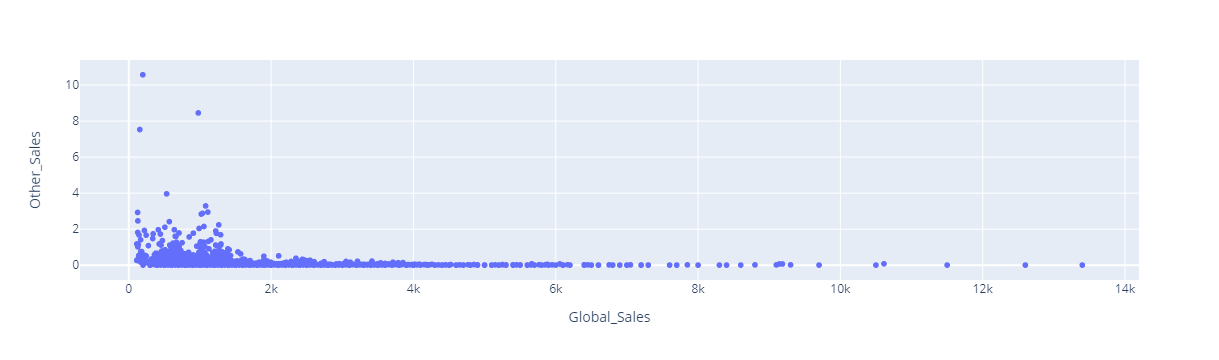

In [15]:
# Plot the total sales of other to global and it seems it has decreased over the years
fig = px.scatter(df,x='Global_Sales',y='Other_Sales')
fig.show()